In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

ramen = pd.read_csv(r"C:\Users\tyler\Downloads\ramen-ratings.csv")

In [42]:
print(ramen.head())
columns = list(ramen)
print(ramen.describe())
print(ramen.Stars)

   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
          Review #
count  2580.000000
mean   1290.500000
std     744.926171
min       1.000000
25%     645.750000
50%    1290.500000
75%    1935.250000
max    2580.000000
0       3.75
1          1
2       2.25
3       2.75
4       3.75
        ... 
2575     3.5
2576       1
2577     

In [43]:
print(list(ramen.Variety.unique()))

["T's Restaurant Tantanmen ", 'Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles', 'Cup Noodles Chicken Vegetable', 'GGE Ramen Snack Tomato Flavor', 'Singapore Curry', 'Kimchi song Song Ramen', 'Spice Deli Tantan Men With Cilantro', 'Nabeyaki Kitsune Udon', 'Hokkaido Soy Sauce Ramen', 'The Original Spicy Stir-Fried Noodles', 'Creamy tom Yum Kung Flavour', 'Yokohama Tonkotsu Shoyu', 'Mr. Bibim Stir-Fried Kimchi Flavor', 'Deka Buto Kimchi Pork Flavor', 'Demae Ramen Bar Noodle Aka Tonkotsu Flavour Instant Noodle', 'Mushroom Flavour Instant Noodles', 'Mario Masala Noodles', 'Tokyo Shoyu Ramen', 'Mi Hai Cua', 'Premium Gomtang', 'Cup Noodles Laksa Flavour', 'Beef Ramen', 'Creamy Soup With Crushed Noodles Hot & Sour Fish Flavor', 'Sapporo Miso Ramen', 'Hot Garlic Instant Noodles', 'Song Song Kimchi Big Bowl', 'Instant Noodles Beef In Light Soup Flavour', 'Hakata Ramen Noodle White Tonkotsu', 'Penang White Curry Rice Vermicelli Soup', 'Signature Tom Yum Flavor Instant Noodles', 'Paeg

In [44]:
style_binary_values = pd.get_dummies(ramen.Style)

In [45]:
country_names = ramen.Country.unique()
print(country_names)

def region_assignment(x): 
    if x in ['USA', 'United States', 'Mexico', 'Canada']: 
        return 'North America'
    elif x in ['Colombia', 'Brazil']:
        return 'South America'
    elif x in ['Pakistan', 'Vietnam', 'Japan', 'Taiwan', 'South Korea', 'Singapore', 'Thailand', 
               'Hong Kong', 'Myanmar', 'Nepal', 'Malaysia', 'Singapore', 
               'China', 'Sarawak', 'Phillipines', 'Dubai']:
        return 'Asia'
    elif x in ['Germany', 'Hungary', 'Holland', 'Poland', 'Finland']:
        return 'Europe'
    elif x in ['Ghana']: 
        return 'Africa'
    else: 
        return 'Oceania'
    
ramen['Region'] = ramen.Country.apply(func = region_assignment)

region_values = pd.get_dummies(ramen.Region)

['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']


In [75]:
def spicy_indicator(x): 
    if 'Spicy' in x or 'Hot' in x: 
        return 1
    else: 
        return 0
def chicken_indicator(x): 
    if 'Chicken' in x: 
        return 1
    else: return 0 
    
def pork_indicator(x):
    if 'Pork' in x: 
        return 1
    else:
        return 0 
    
def beef_indicator(x): 
    if 'Beef' in x or 'Oxtain' in x:
        return 1 
    else: 
        return 0 
    
def other_indicator(x): 
    if 'Chicken' in x:
        return 0 
    elif 'Beef' in x: 
        return 0 
    elif 'Pork' in x: 
        return 0 
    else: 
        return 1

ramen['Spicy'] = ramen.Variety.apply(func = spicy_indicator)
ramen['Chicken'] = ramen.Variety.apply(func = chicken_indicator)
ramen['Beef'] = ramen.Variety.apply(func = beef_indicator)
ramen['Pork'] = ramen.Variety.apply(func = pork_indicator)
ramen['Other'] = ramen.Variety.apply(func = other_indicator)

print(ramen.Beef.sum())
print(ramen.Chicken.sum())
print(ramen.Pork.sum())
print(ramen.Other.sum())

232
323
102
1921


In [47]:
ramen = pd.concat([ramen, style_binary_values, region_values], ignore_index = False, axis=1)
print(list(ramen))

['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten', 'Region', 'Spicy', 'Chicken', 'Pork', 'Veggie', 'Bar', 'Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Tray', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [48]:
ramen.dtypes

Review #          int64
Brand            object
Variety          object
Style            object
Country          object
Stars            object
Top Ten          object
Region           object
Spicy             int64
Chicken           int64
Pork              int64
Veggie            int64
Bar               uint8
Bowl              uint8
Box               uint8
Can               uint8
Cup               uint8
Pack              uint8
Tray              uint8
Africa            uint8
Asia              uint8
Europe            uint8
North America     uint8
Oceania           uint8
South America     uint8
dtype: object

In [49]:
print(ramen.head(10))

   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   
5      2575   Samyang Foods   
6      2574         Acecook   
7      2573     Ikeda Shoku   
8      2572      Ripe'n'Dry   
9      2571            KOKA   

                                             Variety Style      Country Stars  \
0                          T's Restaurant Tantanmen    Cup        Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack       Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup          USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack       Taiwan  2.75   
4                                    Singapore Curry  Pack        India  3.75   
5                             Kimchi song Song Ramen  Pack  South Korea  4.75   
6                Spice Deli Tantan Men With Cilantro   Cup        Japan     4   
7         

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2575    3.50
2576    1.00
2577    2.00
2578    2.00
2579    0.50
Name: Stars, Length: 2580, dtype: float64
There are 0 null values.


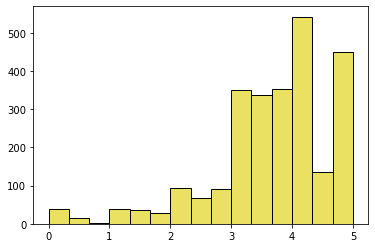

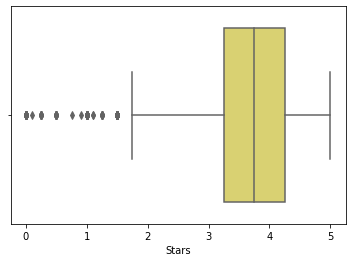

<Figure size 432x288 with 0 Axes>

In [50]:
ramen.Stars = pd.to_numeric(ramen.Stars, errors = 'coerce')
print(ramen.Stars)
ramen.dropna(subset = ['Stars'], axis = 0, inplace = True)
print("There are", ramen.Stars.isna().sum(), "null values.")

plt.hist(ramen.Stars, bins = 15, color = '#EAE061', edgecolor = 'black')
plt.show()
plt.clf()

sns.boxplot(x = ramen.Stars, color = '#EAE061')
plt.show()
plt.clf()

median_stars = ramen.Stars.median()
mean_stars = ramen.Stars.mean()
std_stars = ramen.Stars.std()


minimum_star_rating = ramen.Stars.min()
maximum_star_rating = ramen.Stars.max()

#print("The average rating is", round(mean_stars, 2), "stars.")
#print("The median rating is", round(median_stars, 2), "stars.")
#print("The standard deviation is", round(std_stars, 2), "stars.")

#print("The lowest rating is", round(minimum_star_rating, 2), "stars.")
#print("THe highest rating is", round(maximum_star_rating, 2), "stars.")

In [51]:
ramen_reviewers = ramen.Country.unique()
country_average_rating = ramen.groupby('Country').Stars.mean()
print(country_average_rating)

Country
Australia        3.138636
Bangladesh       3.714286
Brazil           4.350000
Cambodia         4.200000
Canada           2.243902
China            3.421893
Colombia         3.291667
Dubai            3.583333
Estonia          3.500000
Fiji             3.875000
Finland          3.583333
Germany          3.638889
Ghana            3.500000
Holland          3.562500
Hong Kong        3.801825
Hungary          3.611111
India            3.395161
Indonesia        4.067460
Japan            3.981605
Malaysia         4.154194
Mexico           3.730000
Myanmar          3.946429
Nepal            3.553571
Netherlands      2.483333
Nigeria          1.500000
Pakistan         3.000000
Philippines      3.329787
Poland           3.625000
Sarawak          4.333333
Singapore        4.126147
South Korea      3.790554
Sweden           3.250000
Taiwan           3.665402
Thailand         3.384817
UK               2.997101
USA              3.457043
United States    3.750000
Vietnam          3.187963
Name

In [52]:
pack_type_averages = ramen.groupby('Style').Stars.mean()
print(pack_type_averages)

Style
Bar     5.000000
Bowl    3.670686
Box     4.291667
Can     3.500000
Cup     3.498500
Pack    3.700458
Tray    3.545139
Name: Stars, dtype: float64


Here we see only one review for ramen of the "bar" style which explains the even 5-star average above. 

In [53]:
ramen[ramen.Style == 'Bar']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Region,Spicy,Chicken,...,Can,Cup,Pack,Tray,Africa,Asia,Europe,North America,Oceania,South America
1425,1155,Komforte Chockolates,Savory Ramen,Bar,USA,5.0,NaN,North America,0,0,...,0,0,0,0,0,0,0,1,0,0


Now I conducted a multiple linear regression looking at the relationship between the flavor of ramen, the country it was produced, the packaging style of ramen, and the overall rating a reviewer assigns said product, which serves as the dependent variable in this analysis. For each independent variable, a specific variable is left out for reference (in this case, "Oceania," "Other (that's not chicken, beef, or pork ramen)", and "Bar" ramen. 

In [80]:
x = ramen[['Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Tray', 'North America', 'Africa', 'South America', 'Europe', 'Asia', 'Spicy', 'Chicken', 'Beef', 'Pork']]
y = ramen.Stars

x = sm.add_constant(x)

est = sm.OLS(y, x).fit() 
est.summary()

C:\Users\tyler\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.216
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           4.55e-13
Time:                        19:16:47   Log-Likelihood:                -3649.2
No. Observations:                2577   AIC:                             7330.
Df Residuals:                    2561   BIC:                             7424.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9028      0.581      6.715      0.000       2.763       5.042
Bowl             -0.3187      0.580     -0.550      0.582      -1.455       0.818
Box               0.3139      0.707      0.444      0.657      -1.073       1.701
Can              -0.0364      1.156     -0.031      0.975      -2.303       2.231
Cup              -0.4249      0.580     -0.733      0.464      -1.562       0.712
Pack             -0.2869      0.578     -0.496      0.620      -1.421       0.847
Tray             -0.3474      0.586     -0.593      0.553      -1.496       0.801
North America    -0.1305      0.077     -1.694      0.090      -0.282       0.021
Africa            0.0652      0.713      0.092      0.927      -1.332       1.462
South America     0.2196      0.307      0.715      0.475      -0.383       0.822
Europe            0.0875      0.156      0.561      0.575      -0.218       0.393
Asia              0.2040      0.061      3.323      0.001       0.084       0.324
Spicy             0.0108      0.059      0.182      0.856      -0.106       0.127
Chicken          -0.2359      0.062     -3.802      0.000      -0.358      -0.114
Beef             -0.1811      0.071     -2.568      0.010      -0.319      -0.043
Pork             -0.2756      0.102     -2.701      0.007      -0.476      -0.075
==============================================================================
Omnibus:                      470.164   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.624
Skew:                          -1.110   Prob(JB):                    5.43e-195
Kurtosis:                       4.845   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
north_america_ratings = ramen.Stars[ramen.Region == 'North America']
south_america_ratings = ramen.Stars[ramen.Region == 'South America']
europe_ratings = ramen.Stars[ramen.Region == 'Europe']
africa_ratings = ramen.Stars[ramen.Region == 'Africa']
asia_ratings = ramen.Stars[ramen.Region == 'Asia']
oceania_ratings = ramen.Stars[ramen.Region == 'Oceania']

f_stat, p_val = f_oneway(north_america_ratings, south_america_ratings, europe_ratings, africa_ratings, asia_ratings, oceania_ratings)

print('f-stat:', f_stat)
print('p_value', p_val)

f-stat: 11.56464674893
p_value 4.564468592903681e-11


In [56]:
tukey = pairwise_tukeyhsd(endog = ramen.Stars, groups = ramen.Region, alpha = 0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Africa          Asia   0.2469    0.9  -1.781  2.2748  False
       Africa        Europe   0.1223    0.9 -1.9471  2.1918  False
       Africa North America  -0.1522    0.9 -2.1842  1.8797  False
       Africa       Oceania   0.0184    0.9 -2.0145  2.0513  False
       Africa South America   0.2727    0.9 -1.9306  2.4761  False
         Asia        Europe  -0.1245    0.9 -0.5481   0.299  False
         Asia North America  -0.3991  0.001 -0.5592  -0.239   True
         Asia       Oceania  -0.2285  0.002 -0.3997 -0.0573   True
         Asia South America   0.0259    0.9  -0.841  0.8927  False
       Europe North America  -0.2746 0.4864 -0.7172   0.168  False
       Europe       Oceania   -0.104    0.9 -0.5507  0.3427  False
       Europe South America   0.1504    0.9 -0.8097  1.1104  F